In [38]:
import requests 
from bs4 import BeautifulSoup

In [43]:
keyword = '대구 심야버스'
num = 0
url = f'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start{10*num + 1}'
res = requests.get(url)
if res.ok == True:
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.find_all('a', class_ = 'news_tit')
    article = soup.find_all('a', class_= 'api_txt_lines dsc_txt_wrap')
else:
    print(res)

'[사설] 대구시내버스 막차시간 조정 왜 안 되나'

In [45]:
import os
import pandas as pd
from nltk import Text

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
plt.rcParams['font.family'] = 'NanumGothic'

In [7]:
os.getcwd()

'c:\\Users\\EonKim\\Desktop\\github\\Engineering\\web crawling'

In [46]:
df = pd.read_csv('dataset/tokens.csv', index_col = 0)
df.head()

,tokens
0,"['지하철', '운행', '중', '지시', '문자', '안내']"
1,"['홈페이지', '게시', '내용', '수정', '감염병', '분류']"
2,"['대구시', '민방위대', '신청']"
3,"['어린이회관', '공영', '주차장', '관련']"
4,"['앞산', '정상', '길', '야간', '산행', '위', '조명', '설치',..."


In [9]:
data = []

for idx in df.values.tolist():
    if idx != ['대구']:
        data += idx


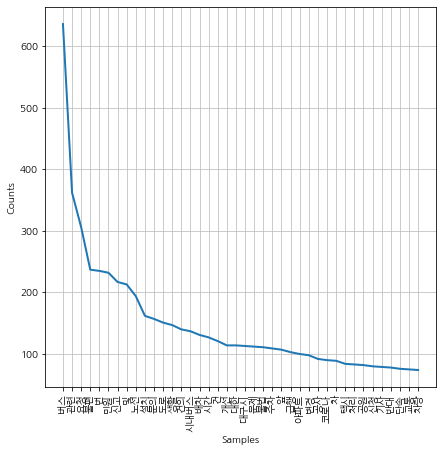

In [10]:
plt.figure( figsize = (7, 7))
minwon = Text(data, name = 'minwon')
minwon.plot(40)
plt.show()

In [65]:
from gensim.models import Word2Vec 
import re

In [77]:
result = []
for i in range(len(df)):
    result.append(df.values)

In [91]:
df.iloc[0].values.tolist()

["['지하철', '운행', '중', '지시', '문자', '안내']"]

In [95]:
df['tokens']

0                    ['지하철', '운행', '중', '지시', '문자', '안내']
1                 ['홈페이지', '게시', '내용', '수정', '감염병', '분류']
2                                   ['대구시', '민방위대', '신청']
3                            ['어린이회관', '공영', '주차장', '관련']
4       ['앞산', '정상', '길', '야간', '산행', '위', '조명', '설치',...
                              ...                        
4543                       ['출근', '시간', '버스', '배차', '시간']
4544    ['정부', '지침', '공공기관', '경북', '병원', '행정자치부', '대구시...
4545     ['신천', '아파트', '옆', '복개', '구간', '녹지', '공간', '조성']
4546    ['대구광역시', '관내', '국가지원지방도', '제', '호선', '상세', '노...
4547                            ['도대체', '행정', '처리', '언제']
Name: tokens, Length: 4548, dtype: object

In [48]:
embedding_model = Word2Vec(df, size = 20, window = 5, min_count =1, workers = 4, iter = 200, sg = 1)
